In [ ]:
!pip install mtcnn         # Multi-Task Cascaded Convolutional Neural Networks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00


In [2]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

Automation Processing Image

In [4]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x, y, w, h = self.detector.detect_faces(img)[0]['box']
        x, y = abs(x), abs(y)
        face = img[y: y+h, x: x+w]
        face_arr = cv.resize(face, self.target_size)

        return face_arr

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass

        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + "/" + sub_dir + "/"
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")

            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)

    def plot_images(self):
        plt.figure(figsize = (18, 16))
        for num, image in enumerate(self.X):
            ncols = 3
            nrows = len(Y) // ncols + 1
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(image)
            plt.axis('off')

In [5]:
faceloading = FACELOADING("/content/drive/MyDrive/Face-Recognition-Using-FaceNet/dataset/")
X, Y = faceloading.load_classes()

Loaded successfully: 20
Loaded successfully: 20
Loaded successfully: 20
Loaded successfully: 20


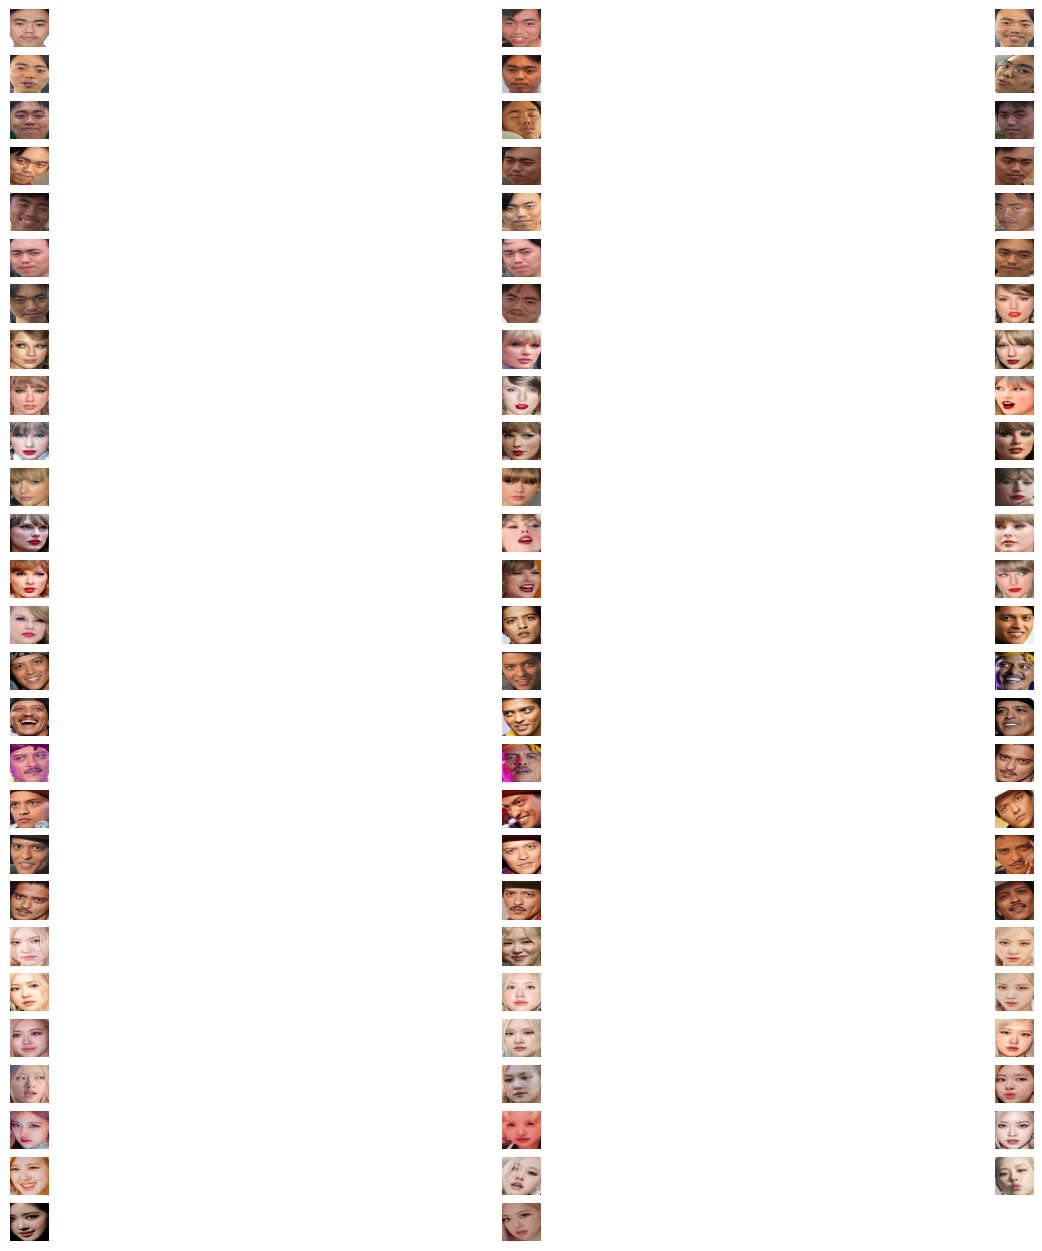

In [8]:
faceloading.plot_images()

FaceNet part

In [9]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=eda30790c22d3d634b1dd709076032630a6002c604be1d8c8229ae29b351fcb6
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [10]:
from keras_facenet import FaceNet

embedder = FaceNet()

def get_embedding(face_img):

    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)

    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [11]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━

In [12]:
np.savez_compressed('Face_Embedding.npz', EMBEDDED_X, Y)

Build Model

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [14]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical

In [16]:
# Convert labels to categorical (one-hot encoded) format for the neural network
Y_categorical = to_categorical(Y, num_classes=len(np.unique(Y)))

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_dim=512),  # Match input_dim with embedding size
    Dense(len(np.unique(Y)), activation='softmax')  # Number of output classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the softmax classifier
model.fit(EMBEDDED_X, Y_categorical, epochs = 10, batch_size = 16, validation_split = 0.2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.1106 - val_accuracy: 0.9375 - val_loss: 0.7541
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0829 - val_accuracy: 0.9375 - val_loss: 0.6708
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0719 - val_accuracy: 0.9375 - val_loss: 0.5911
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0583 - val_accuracy: 1.0000 - val_loss: 0.5183
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.4523
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 0.3928
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.3413
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 0.2985
Epoch

In [32]:
# Save the trained model
model.save("Predict_Model.h5")

Predicting

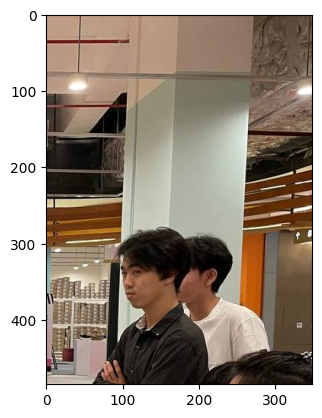

In [33]:
path = "/content/drive/MyDrive/Face-Recognition-Using-FaceNet/Testing/123.jpg"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
t_im = cv.imread(path)
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [35]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [36]:
test_im = np.array(test_im).reshape(1, -1)

y_preds = model.predict(test_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [37]:
max_index = np.argmax(y_preds)
y_preds

array([[0.01045965, 0.9663748 , 0.00505828, 0.01810731]], dtype=float32)

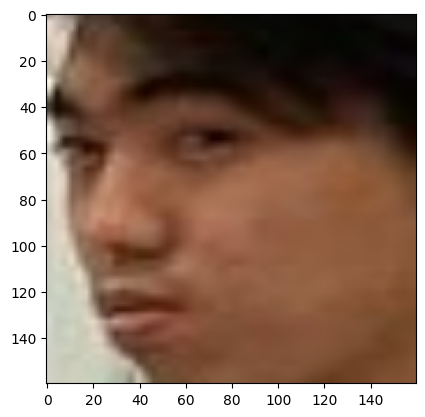

In [38]:
plt.imshow(t_im)

In [39]:
max_prob = np.max(y_preds)

face_embedding = EMBEDDED_X[0]  # Example: using an embedding from the dataset
predictions = model.predict(face_embedding.reshape(1, -1))
predicted_class = np.argmax(predictions)

predicted_label = encoder.inverse_transform([predicted_class])

print("Max Probability:", max_prob)
print("Predicted Label:", predicted_label[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Max Probability: 0.9663748
Predicted Label: Keanghok
